## Introduction: Voor deze opdracht wordt er gebruik gemaakt van de Fitbit data van verschillende mensen. Er wordt met name gebruik gemaakt van de stappentellen en persoonlijke gegevens van de persoon. 

## Data cleaning: Eerst wordt dataset van de stappenteller samengevoegd met de persoonlijke data. Vervolgens worden alle NAN's omgezet in een '0'. Er wordt ook een nieuwe kolom gemaakt met het gemiddelde stappen die de persoon per dag zet. Als laatste werden de outliers verwijderd

## Document inladen 

In [1]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.model_selection import train_test_split #this is the function we need to split the data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
steps = pd.read_csv('steps.csv', sep = ';')
survey = pd.read_csv('survey.csv')

Bestand mergen en NAN's omzetten

In [2]:
df = pd.merge(steps, survey, on=['id'], how = 'outer')
df = df.fillna(0)

Nieuwe kolom met 'mean steps per participant' maken 

In [3]:
df['mean steps per participant'] = df.iloc[:, 0:-9].mean(axis=1) 
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean steps per participant
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,5133.878049
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,2826.378049
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,0.0,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,3745.911585
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,221.548780
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,874.573171


<AxesSubplot:xlabel='mean steps per participant'>

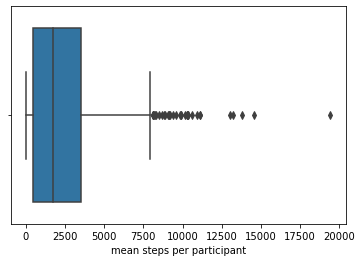

In [4]:
sns.boxplot(x= 'mean steps per participant', data=df)

Outliers verwijderen 

In [5]:
df = df[df['mean steps per participant'] < 15000]

In [6]:
df = df[df['weight'] < 600]
df = df[df['height'] > 100]

Boxplot en Histogram maken 

<AxesSubplot:xlabel='mean steps per participant'>

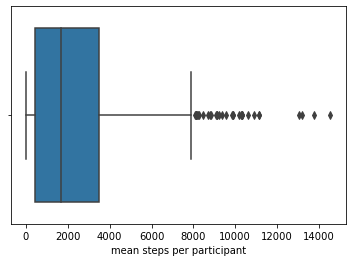

In [7]:
sns.boxplot(x= 'mean steps per participant', data=df)

<AxesSubplot:xlabel='mean steps per participant', ylabel='Count'>

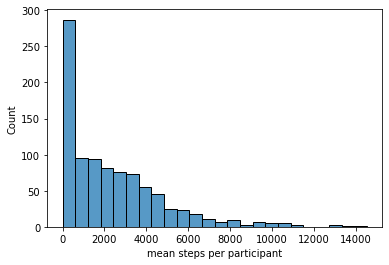

In [8]:
sns.histplot(x= 'mean steps per participant', data=df)

## Grafiek is right-skewed

<AxesSubplot:xlabel='mean steps per participant'>

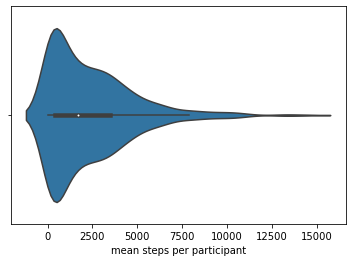

In [9]:
sns.violinplot(x= 'mean steps per participant', data=df)

## Gemiddelde, mediaan, standaard deviatie en variance berekenen

In [10]:
df.describe()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,hh_size,education,height,weight,mean steps per participant
count,926.000000,926.000000,926.00000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,...,926.000000,926.000000,926.000000,926.000000,926.0,926.000000,926.000000,926.000000,926.000000,926.000000
mean,466.057235,94.133909,2352.62095,3257.158747,2361.737581,3044.672786,3298.382289,2933.493521,3360.872570,4128.206263,...,709.136069,691.684665,565.991361,498.601512,0.0,2.340173,2.529158,171.700864,72.024838,2346.150882
std,268.062457,850.659212,5147.89694,6063.612493,5138.220255,5117.008205,5163.619576,5236.015948,4911.479204,5779.212893,...,3155.291099,2736.866995,3020.892819,2025.423770,0.0,1.224897,1.273732,9.062554,16.025602,2369.061667
min,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,145.000000,0.000000,0.054878
25%,234.250000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,165.000000,61.000000,434.770579
50%,466.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,2.000000,172.000000,71.000000,1692.030488
75%,697.750000,0.000000,338.00000,4871.000000,2465.000000,5679.000000,6345.000000,4887.000000,6235.250000,8190.500000,...,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,4.000000,179.000000,81.000000,3491.282012
max,929.000000,11157.000000,44944.00000,39165.000000,40392.000000,29862.000000,23902.000000,31254.000000,23836.000000,43238.000000,...,33379.000000,27605.000000,36031.000000,15098.000000,0.0,11.000000,5.000000,195.000000,155.000000,14539.310976


<AxesSubplot:xlabel='age', ylabel='mean steps per participant'>

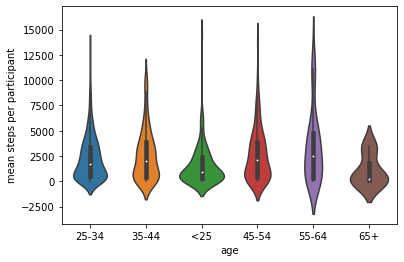

In [11]:
sns.violinplot(x='age',y= 'mean steps per participant', data=df)

<AxesSubplot:xlabel='education', ylabel='mean steps per participant'>

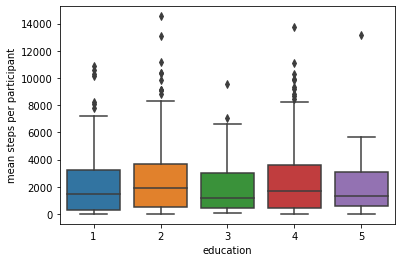

In [12]:
sns.boxplot(x='education',y= 'mean steps per participant', data=df)

Bij mensen van 65+ zijn er weinig mensen die veel stappen maken

Mensen met een hogere educatie maken niet meer stappen 

In [13]:
df2 = df[['height', 'weight', 'mean steps per participant', 'education', 'hh_size']]

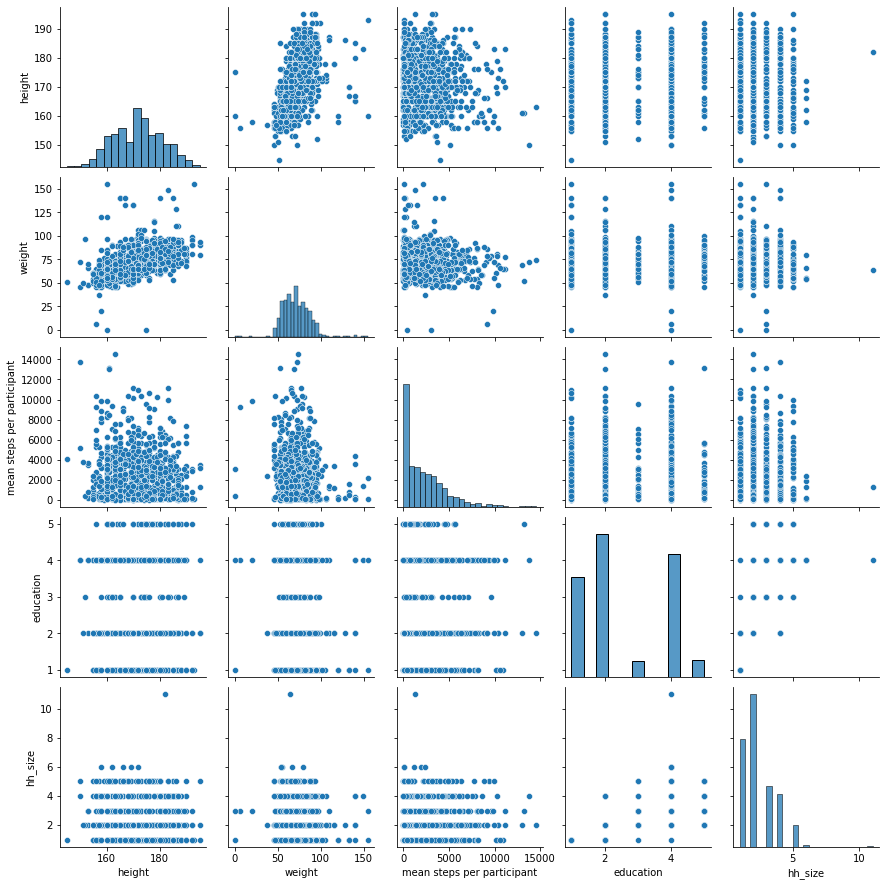

In [14]:
sns.pairplot(df2)

In [15]:
df2.corr()

,height,weight,mean steps per participant,education,hh_size
height,1.000000,0.506965,-0.075571,-0.042372,-0.055100
weight,0.506965,1.000000,-0.103653,-0.001439,0.003369
mean steps per participant,-0.075571,-0.103653,1.000000,0.025949,0.032980
education,-0.042372,-0.001439,0.025949,1.000000,0.824789
hh_size,-0.055100,0.003369,0.032980,0.824789,1.000000


## Lineaire regressie is een rechte lijn naar boven of naar beneden. Met een startpunt en een richtingscoeffeciënt. Als x met een bepaalde waarde verandert gaat Y omhoog of omlaag op basis van de richtingscoeffeciënt.  

In [36]:
df3 = pd.get_dummies(df)
df3 = df3.iloc[:, -23:]
df3.head()
df = df3

In [37]:
x = df.loc[:, ~df.columns.isin(['mean steps per participant'])]
y = df['mean steps per participant']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=23) #splits the data into train (70%) and test (30%) data

In [38]:
lm = LinearRegression()
lm = lm.fit(x_train, y_train)

In [40]:
y_test_p = lm.predict(x_test)

In [41]:
r2_score(y_test, y_test_p)

0.013909846397001546

In [42]:
math.sqrt(mean_squared_error(y_test,y_test_p))

2397.4941175649033

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 926 entries, 0 to 928
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   hh_size                          926 non-null    int64  
 1   education                        926 non-null    int64  
 2   height                           926 non-null    float64
 3   weight                           926 non-null    float64
 4   mean steps per participant       926 non-null    float64
 5   city_Bordeaux                    926 non-null    uint8  
 6   city_Lille                       926 non-null    uint8  
 7   city_Lyon                        926 non-null    uint8  
 8   city_Montpellier                 926 non-null    uint8  
 9   gender_Female                    926 non-null    uint8  
 10  gender_Male                      926 non-null    uint8  
 11  age_25-34                        926 non-null    uint8  
 12  age_35-44             

## Het model werkt momenteel niet goed. De R2 is ontzettend laag en de math sqrd is te hoog. Dit komt waarschijnlijk omdat er teveel variabele tussen zitten met een slechte correlatie. 